In [1]:
from amex_default_prediction.utils import spark_session
from pyspark.ml import PipelineModel
from pathlib import Path

intermediate_root = Path("../data/intermediate")
model_path = intermediate_root / "models/pca/20220723005340-0.14.0-9437c3d"
spark = spark_session()
model = PipelineModel.read().load(model_path.as_posix())
model.stages

f:\kaggle\amex\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
f:\kaggle\amex\venv\lib\site-packages\petastorm\spark\spark_dataset_converter.py:28: FutureWarning: pyarrow.LocalFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  from pyarrow import LocalFileSystem


[RobustScalerModel: uid=RobustScaler_2cfcac53336e, numFeatures=234, withCentering=true, withScaling=true,
 PCAModel: uid=PCA_c21dacce1ff9, k=64]

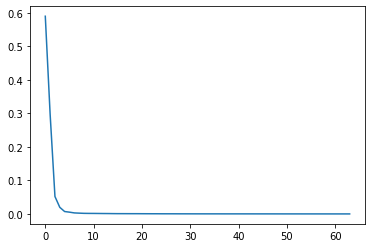

DenseVector([0.5903, 0.2981, 0.052, 0.0197, 0.0072, 0.0053, 0.003, 0.0023, 0.0017, 0.0016, 0.0015, 0.0014, 0.0012, 0.0011, 0.0009, 0.0008, 0.0008, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0005, 0.0005, 0.0004, 0.0004, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [2]:
import matplotlib.pyplot as plt

var = model.stages[1].explainedVariance
plt.plot(var)
plt.show()
var

In [3]:
list(enumerate(var.cumsum()))

[(0, 0.5902665535801818),
 (1, 0.8883535272994129),
 (2, 0.9403065766164452),
 (3, 0.9600145064480812),
 (4, 0.9671789477158099),
 (5, 0.972472421311238),
 (6, 0.9754984216272579),
 (7, 0.9778248089578793),
 (8, 0.9795682073238989),
 (9, 0.9811251135541813),
 (10, 0.982620603859459),
 (11, 0.9839754927836909),
 (12, 0.985170269586386),
 (13, 0.9862776368718504),
 (14, 0.9872102724679561),
 (15, 0.9880215634355913),
 (16, 0.9888121770070765),
 (17, 0.9895604930984064),
 (18, 0.9902743928259581),
 (19, 0.9909696718564277),
 (20, 0.9916001135190773),
 (21, 0.9921700039447827),
 (22, 0.9926947440595869),
 (23, 0.9931905964736751),
 (24, 0.9936147519246246),
 (25, 0.9940106355608527),
 (26, 0.9944024103671216),
 (27, 0.994774027301173),
 (28, 0.9950832969035369),
 (29, 0.9953813952738656),
 (30, 0.9956538790131491),
 (31, 0.995904499311859),
 (32, 0.9961504802274919),
 (33, 0.9963751857394597),
 (34, 0.996597584447585),
 (35, 0.9968152127626861),
 (36, 0.9970189396372628),
 (37, 0.997206001

In [4]:
from amex_default_prediction.model.base import read_train_data
from pyspark.ml.functions import vector_to_array

df, _, _ = read_train_data(
    spark, intermediate_root / "train_data_preprocessed_v2", cache=False
)
subset = df.where("sample_id = 0").limit(5000)
pdf = (
    model.transform(subset)
    .select(vector_to_array("features_pca").alias("feature"))
    .toPandas()
)
pdf.head()

training ratio: 0.8
train_count: 367332, positive: 95202.0
validation_count: 91581, positive: 23626.0


f:\kaggle\amex\venv\lib\site-packages\pyspark\sql\pandas\conversion.py:201: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true, but has reached the error below and can not continue. Note that 'spark.sql.execution.arrow.pyspark.fallback.enabled' does not have an effect on failures in the middle of computation.
  An error occurred while calling o166.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:97)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:93)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Met

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it